<a href="https://colab.research.google.com/github/Chasith-Randima/PyTorch_Course/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


print(torch.__version__)
print(torchvision.__version__)

1.13.1+cu116
0.14.1+cu116


In [ ]:
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
label

9

Image shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, '0')

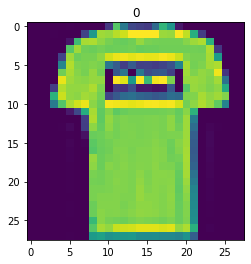

In [ ]:
import matplotlib.pyplot as plt
image,label = train_data[1]
print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'T-shirt/top')

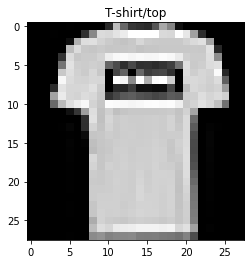

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])

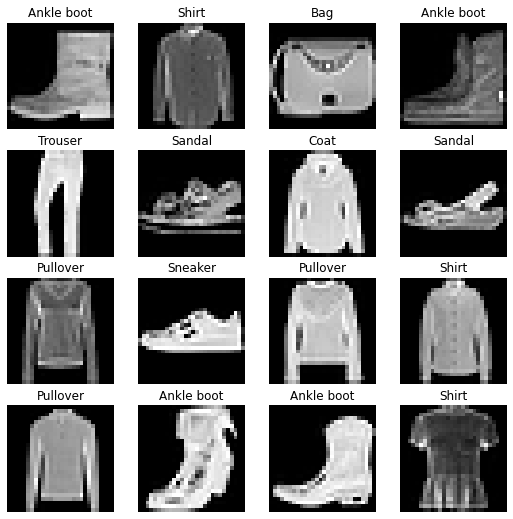

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f2101f78070>,
 <torch.utils.data.dataloader.DataLoader at 0x7f2101f78670>)

In [ ]:
print(f"Dataloaders : {train_dataloader,test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test dataloader : {len(test_dataloader)} batches of {BATCH_SIZE}...")

Dataloaders : (<torch.utils.data.dataloader.DataLoader object at 0x7f2101f78070>, <torch.utils.data.dataloader.DataLoader object at 0x7f2101f78670>)
Length of train dataloader: 1875 batches of 32...
Length of test dataloader : 313 batches of 32...


In [ ]:
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size:torch.Size([1, 28, 28])
Label : 8 , Label size : torch.Size([])


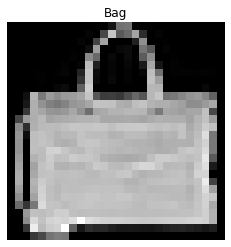

In [ ]:
# torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img,label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"image size:{img.shape}")
print(f"Label : {label} , Label size : {label.shape}")

In [ ]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(f"Shape before flattening : {x.shape}")
print(f"Shape after flattening : {output.shape}")

Shape before flattening : torch.Size([1, 28, 28])
Shape after flattening : torch.Size([1, 784])


In [ ]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_function.py already exisits,skipping download...")
else:
  print("Downloading helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
from timeit import default_timer as timer

def print_train_time(start:float,
                     end:float,
                     device:torch.device = None):
  """ Print difference between start and end time """
  total_time = start - end
  print(f"Train time on {device} : {total_time:.3f} seconds")
  return total_time

In [ ]:
end_time = timer()
start_time = timer()

print_train_time(start=start_time,end=end_time,device="cpu")

Train time on cpu : 0.000 seconds


5.513000007795199e-05

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)

train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------------------")
  train_loss = 0

  for batch,(X,y) in enumerate(train_dataloader):
    model_0.train()

    y_pred = model_0(X)

    loss = loss_fn(y_pred,y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples ")

  train_loss /= len(train_dataloader)

  test_loss,test_acc = 0,0

  model_0.eval()

  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred = model_0(X_test)

      test_loss += loss_fn(test_pred,y_test)

      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

  print(f"\nTrain Loss : {train_loss:.4f} | Test Loss : {test_loss:.4f} , | Test Acc : {test_acc:.4f}")


train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------------------
Looked at 0/60000 samples 
Looked at 12800/60000 samples 
Looked at 25600/60000 samples 
Looked at 38400/60000 samples 
Looked at 51200/60000 samples 

Train Loss : 0.5904 | Test Loss : 0.5095 , | Test Acc : 82.0387
Epoch: 1
--------------------
Looked at 0/60000 samples 
Looked at 12800/60000 samples 
Looked at 25600/60000 samples 
Looked at 38400/60000 samples 
Looked at 51200/60000 samples 

Train Loss : 0.4763 | Test Loss : 0.4799 , | Test Acc : 83.1969
Epoch: 2
--------------------
Looked at 0/60000 samples 
Looked at 12800/60000 samples 
Looked at 25600/60000 samples 
Looked at 38400/60000 samples 
Looked at 51200/60000 samples 

Train Loss : 0.4550 | Test Loss : 0.4766 , | Test Acc : 83.4265
Train time on cpu : -24.928 seconds


In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  """ Returns a dictionary containing the results of model predicting on data loader """

  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      y_pred = model(X)

      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
      
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name":model.__class__.__name__,
          "model_lose":loss.item(),
          "model_acc":acc}

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_lose': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cpu')

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device = device):
  """ Performs a training with model trying to learn on data loader """
  train_loss,train_acc = 0,0
  model.train()
  for batch,(X,y) in enumerate(data_loader):
    X,y = X.to(device),y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred,y)
    train_loss += loss

    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss : {train_loss:.5f} | Train Acc : {train_acc:.2f}% ")


In [ ]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device = device):
  """ Performs a Testing loop step on model going over data loader """
  
  test_loss,test_acc = 0,0

  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device),y.to(device)

      test_pred = model(X)

      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))
      
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test Loss : {test_loss:.5} |  Test Acc : {test_acc:.2f}% /n")

In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch} \n -------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  
train_time_end_on_gpu = timer()

total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0 
 -------
Train Loss : 1.09199 | Train Acc : 61.34% 
Test Loss : 0.95636 |  Test Acc : 65.00% /n
Epoch : 1 
 -------
Train Loss : 0.78101 | Train Acc : 71.93% 
Test Loss : 0.72227 |  Test Acc : 73.91% /n
Epoch : 2 
 -------
Train Loss : 0.67027 | Train Acc : 75.94% 
Test Loss : 0.685 |  Test Acc : 75.02% /n
Train time on cpu : -33.443 seconds


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_lose': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
total_train_time_model_0

-24.92835899399995

In [ ]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_lose': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device):
  """ Returns a dictionary containing the results of model predicting on data loader """

  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,y = X.to(device),y.to(device)
      y_pred = model(X)

      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
      
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name":model.__class__.__name__,
          "model_lose":loss.item(),
          "model_acc":acc}



In [ ]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_lose': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_lose': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
class FashionMNISTModelV2(nn.Module):
  """
  Model Architecture that replicates the TinyVGG  Model from CNN explainer website
  """

  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units * 7 * 7,
                  out_features=output_shape)
    )
  def forward(self,x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

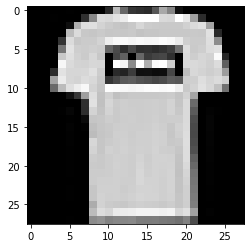

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")

In [ ]:
rand_image_tensor = torch.randn(size=(1,28,28))

rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

In [ ]:
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape : {images.shape}")
print(f"Single image shape : {test_image.shape}")
print(f"Test Image:\n{test_image}")

Image batch shape : torch.Size([32, 3, 64, 64])
Single image shape : torch.Size([3, 64, 64])
Test Image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

conv_output = conv_layer(test_image.unsqueeze(0))
conv_output

tensor([[[[ 1.3047,  1.4238,  0.9435,  ...,  0.3078,  0.4244, -0.3909],
          [ 0.6132,  1.5396,  0.0516,  ...,  0.8711,  0.4256, -0.3416],
          [ 1.0524,  0.3662,  1.0114,  ...,  0.2809, -0.2741,  0.3787],
          ...,
          [ 0.0377,  0.2981, -0.2432,  ..., -0.7283, -0.5767, -0.0783],
          [-0.2693, -0.0386, -0.0781,  ...,  0.4228, -0.1802, -0.5140],
          [ 0.5006, -0.5684,  0.1166,  ...,  0.5425, -0.3335,  0.7756]],

         [[-0.1153,  0.5129, -0.7227,  ..., -0.6758,  0.4840, -0.8125],
          [ 0.2266, -0.2840, -0.0319,  ...,  1.5599, -1.2449, -0.4410],
          [-0.6666,  0.2753, -0.1262,  ...,  0.1999, -0.8856, -0.4292],
          ...,
          [-0.0647, -0.1984, -0.6386,  ..., -0.0585, -0.7833, -0.0764],
          [ 0.2940, -0.6306, -0.2052,  ...,  0.2456, -0.7134,  0.7373],
          [-0.1683, -0.8397,  0.2643,  ...,  0.2593, -0.5630,  0.1587]],

         [[ 0.4864, -0.7476, -0.6414,  ...,  0.5477, -1.2156,  0.2989],
          [-0.5791,  0.4414,  

In [ ]:
print(f"Test image original shape : {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer() : {test_image_through_conv.shape}")

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer() : {test_image_through_conv_and_max_pool.shape}")

Test image original shape : torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer() : torch.Size([1, 10, 64, 64])
Shape after going through conv_layer() and max_pool_layer() : torch.Size([1, 10, 32, 32])


In [ ]:
torch.manual_seed(42)

random_tensor = torch.randn(size=(1,1,2,2))

print(f"\n Random tensor : \n{random_tensor}")
print(f"Random tensor shape:{random_tensor.shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)

print(f"\nMax Pool tensor \n:{max_pool_tensor}")
print(f"Max pool tensor shape : {max_pool_tensor.shape}")

random_tensor


 Random tensor : 
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape:torch.Size([1, 1, 2, 2])

Max Pool tensor 
:tensor([[[[0.3367]]]])
Max pool tensor shape : torch.Size([1, 1, 1, 1])


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight', tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
                    

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n ------------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  
train_time_end_model_2 = timer()

total_train_time_model_2 = print_train_time(start=train_time_start_model_2,end=train_time_end_model_2,device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
 ------------
Train Loss : 0.59518 | Train Acc : 78.38% 
Test Loss : 0.395 |  Test Acc : 85.99% /n
Epoch : 1
 ------------
Train Loss : 0.36536 | Train Acc : 86.90% 
Test Loss : 0.35244 |  Test Acc : 86.91% /n
Epoch : 2
 ------------
Train Loss : 0.32588 | Train Acc : 88.13% 
Test Loss : 0.32719 |  Test Acc : 88.07% /n
Train time on cpu : -149.586 seconds


In [ ]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_lose': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_lose': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])

compare_results

,model_name,model_lose,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


In [ ]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]



compare_results

,model_name,model_lose,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,-24.928359
1,FashionMNISTModelV1,0.685001,75.019968,-33.443142
2,FashionMNISTModelV2,0.327190,88.069089,-149.585804


Text(0, 0.5, 'model')

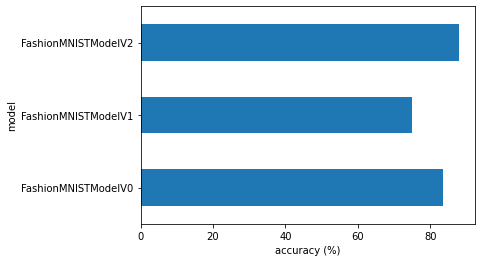

In [ ]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

In [ ]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample,dim=0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [ ]:
img,label = test_data[0][:10]
img.shape,label

(torch.Size([1, 28, 28]), 9)

In [ ]:
import random
# random.seed(42)
test_samples = []
test_labels = []

for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Trouser')

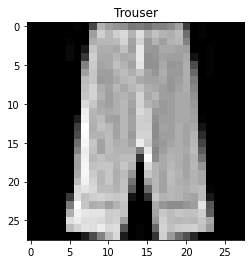

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs[:2]

tensor([[1.7017e-04, 9.9268e-01, 1.9975e-04, 1.8463e-03, 2.5158e-03, 8.6975e-06,
         2.4011e-03, 2.0206e-06, 1.6950e-04, 5.1796e-06],
        [1.1311e-03, 1.0506e-04, 6.1717e-04, 3.1075e-05, 1.4050e-04, 1.2083e-03,
         3.6977e-03, 2.2497e-03, 9.9016e-01, 6.5941e-04]])

In [ ]:
test_labels

[1, 8, 8, 9, 7, 7, 9, 3, 9]

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 8, 8, 9, 7, 7, 9, 3, 9])

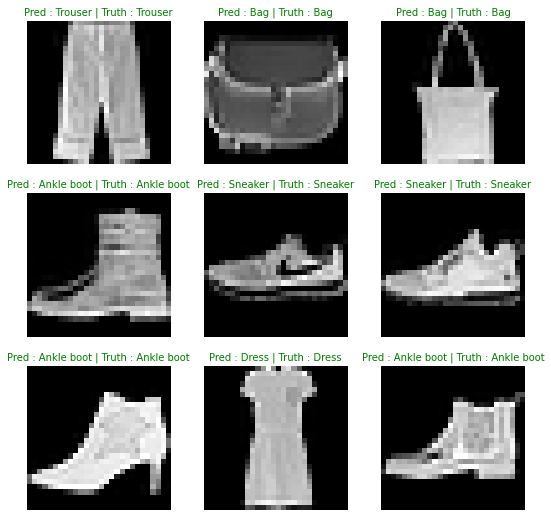

In [ ]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(),cmap="gray")
  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]
  title_text = f"Pred : {pred_label} | Truth : {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")
  plt.axis(False)

In [ ]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval()

with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="Making Predictions..."):
    X,y = X.to(device),y.to(device)

    y_logit = model_2(X)

    y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)

    y_preds.append(y_pred.cpu())

# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
# y_pred_tensor[:10]
y_pred_tensor

Making Predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
try:
  import torchmetrix,mlxtend
  print(f"mlxtend verion : {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19,"mlxtend version shoul be 0.19.0 or higher")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics,mlxtend
  print(f"mlxtend vertion : {mlxtend.__version__}")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.4 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0
mlxtend vertion : 0.21.0


In [ ]:
import mlxtend

In [ ]:
mlxtend.__version__

'0.21.0'

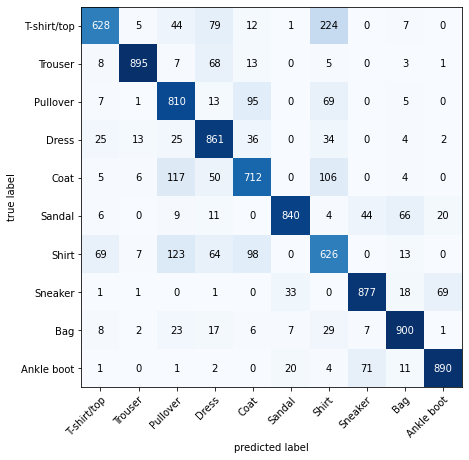

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass",num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig,ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

In [ ]:
confmat_tensor

tensor([[628,   5,  44,  79,  12,   1, 224,   0,   7,   0],
        [  8, 895,   7,  68,  13,   0,   5,   0,   3,   1],
        [  7,   1, 810,  13,  95,   0,  69,   0,   5,   0],
        [ 25,  13,  25, 861,  36,   0,  34,   0,   4,   2],
        [  5,   6, 117,  50, 712,   0, 106,   0,   4,   0],
        [  6,   0,   9,  11,   0, 840,   4,  44,  66,  20],
        [ 69,   7, 123,  64,  98,   0, 626,   0,  13,   0],
        [  1,   1,   0,   1,   0,  33,   0, 877,  18,  69],
        [  8,   2,  23,  17,   6,   7,  29,   7, 900,   1],
        [  1,   0,   1,   2,   0,  20,   4,  71,  11, 890]])

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to : {MODEL_SAVE_PATH}")

torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to : models/03_pytorch_computer_vision_model_2.pth


In [ ]:
image_shape = [1,28,28]

In [ ]:
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))


loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_lose': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_lose': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
torch.isclose(torch.tensor(model_2_results["model_lose"]),torch.tensor(loaded_model_2_results["model_lose"]),atol=le-02)

tensor(True)